# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(study_results, mouse_metadata, how='left', on ='Mouse ID')
# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [142]:
# Checking the number of mice.
combined_mouse_data['Mouse ID'].nunique()

249

In [143]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_id = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicated_id

array(['g989'], dtype=object)

In [144]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_data.loc[combined_mouse_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [145]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = combined_mouse_data.loc[combined_mouse_data["Mouse ID"].isin(duplicated_id)==False, :]
clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [146]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study['Mouse ID'].nunique()

248

## Summary Statistics

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_clean = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).mean()
median_clean = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).median()
variance_clean = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).var()
std_clean = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).std()
sem_clean = clean_mouse_study['Tumor Volume (mm3)'].groupby(clean_mouse_study['Drug Regimen']).sem()

Summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean_clean,
                                   'Median Tumor Volume': median_clean,
                                   'Tumor Volume Variance': variance_clean,
                                   'Tumor Volume Std. Dev.': std_clean,
                                   'Tumor Volume Std. Err.': sem_clean})
Summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
clean_mouse_study["Tumor Volume (mm3)"].groupby(clean_mouse_study["Drug Regimen"]).aggregate(['mean','median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

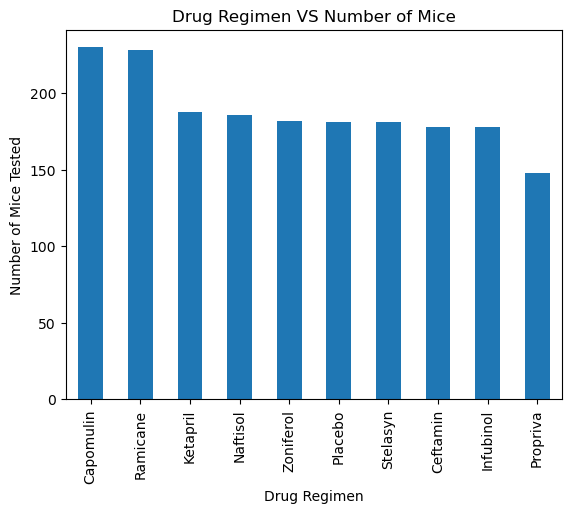

In [149]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot = clean_mouse_study['Timepoint'].groupby(clean_mouse_study['Drug Regimen']).count().sort_values(ascending=False)
bar_chart = bar_plot.plot(kind="bar", title="Drug Regimen VS Number of Mice")
bar_chart.set_xlabel('Drug Regimen')
bar_chart.set_ylabel('Number of Mice Tested')
plt.show()


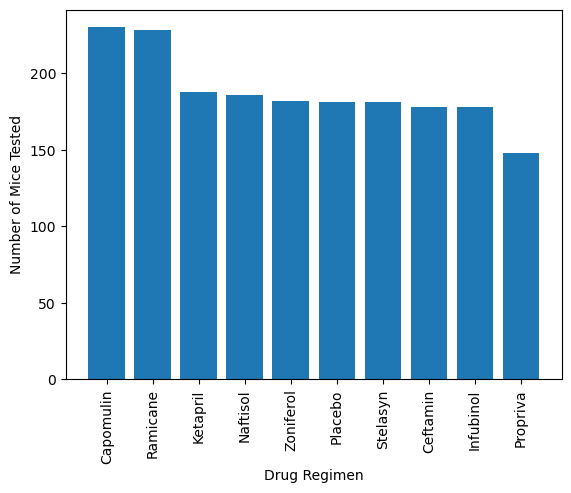

In [150]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_plot = clean_mouse_study['Timepoint'].groupby(clean_mouse_study['Drug Regimen']).count().sort_values(ascending=False).reset_index(drop=False)
df = pd.DataFrame(bar_plot)
x_axis = df['Drug Regimen']
y_axis = df['Timepoint']

plt.bar(x_axis, y_axis, align='center')
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 90)
plt.ylabel('Number of Mice Tested')

plt.show()


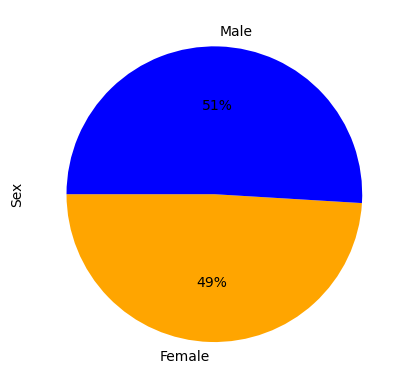

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_plot = clean_mouse_study['Sex'].value_counts().sort_values()
df = pd.DataFrame(pie_plot)
colors = ['Orange', 'Blue']
pie_chart = df.plot(kind = 'pie', y='Sex', autopct='%1.0f%%', colors=colors, startangle = 180, legend=False)
plt.show()


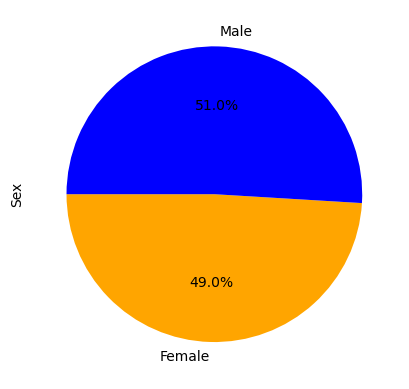

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = clean_mouse_study['Sex'].unique()
sizes = clean_mouse_study['Sex'].value_counts().sort_values()
colors = ['orange', 'blue']

plt.pie(sizes, labels=labels, colors=colors,
autopct="%1.1f%%",startangle=180)
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [153]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
df = clean_mouse_study['Timepoint'].groupby(clean_mouse_study["Mouse ID"]).max().reset_index(drop=False)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(df , clean_mouse_study, on= ["Mouse ID", "Timepoint"], how='left')
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [154]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


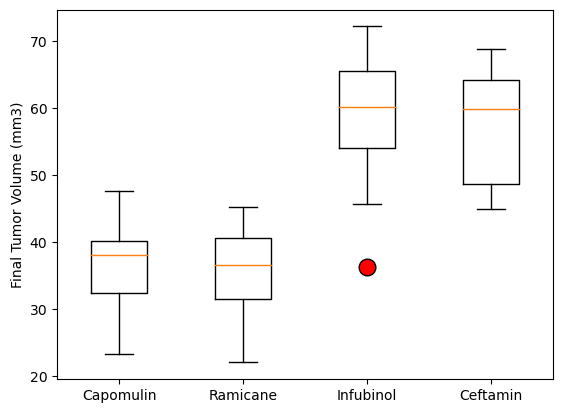

In [155]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tumor_data, flierprops={'marker':"o", 'markerfacecolor':'red', 'markersize': 12})
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(drugs)
plt.show()


## Line and Scatter Plots

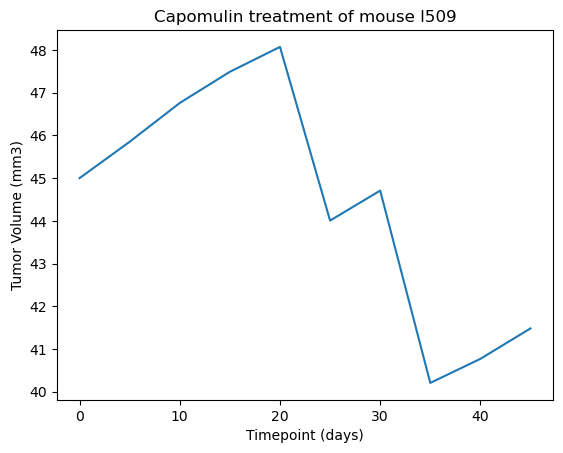

In [156]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 'l509'
capomulin_df = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] == 'Capomulin']
mouse_df = capomulin_df.loc[capomulin_df['Mouse ID'] == mouse_id]

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.show()


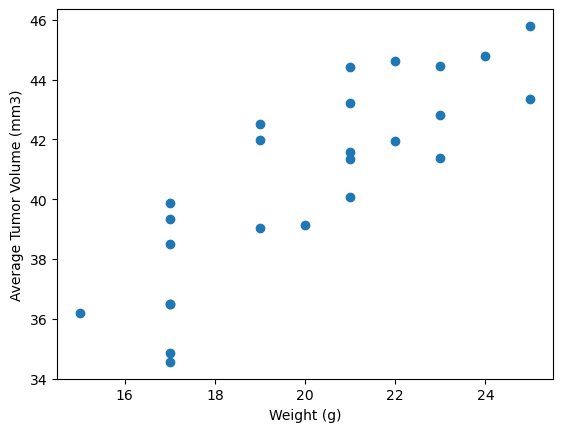

In [164]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_df.groupby('Mouse ID').aggregate({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

plt.scatter(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


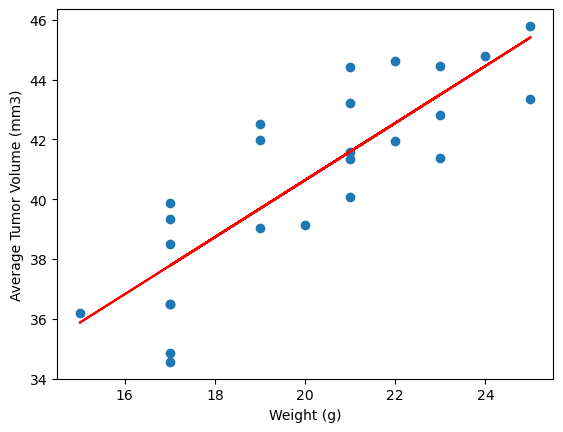

In [165]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_df.groupby('Mouse ID').aggregate({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

correlation = st.pearsonr(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)}")

slope, intercept, rvalue, pvalue, stderr = linregress(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'])

plt.scatter(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'])
plt.plot(mouse_data['Weight (g)'], slope * mouse_data['Weight (g)'] + intercept, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()